# Modeling Phase 2: Aggregation

- In Phase 2, I will use the **New York State** dataset to train the models. 
- The dataset consists of **1,521 observations**, and each observation is an aggregated value representing a zipcode. The aggregated value was generated using 87,684 businesses information from Google. 
- The goal for this phase is to explore different modeling options and choose the best type of model for this dataset. 
- In Phase 2, some features from the **Income dataset**, such as population, population density, will be used in training the models. 
- I will use **R2 score** as the metric to evaluate the models.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-Phase-2:-Aggregation" data-toc-modified-id="Modeling-Phase-2:-Aggregation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling Phase 2: Aggregation</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Define-constants" data-toc-modified-id="Define-constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Define constants</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Pattern-submodel-to-handle-missing-values" data-toc-modified-id="Pattern-submodel-to-handle-missing-values-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Pattern submodel to handle missing values</a></span></li></ul></li><li><span><a href="#Model-preparation" data-toc-modified-id="Model-preparation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Model preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-model" data-toc-modified-id="Baseline-model-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Baseline model</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Ridge-Regularzation" data-toc-modified-id="Ridge-Regularzation-1.6.2.1"><span class="toc-item-num">1.6.2.1&nbsp;&nbsp;</span>Ridge Regularzation</a></span></li><li><span><a href="#Lasso-Regularzation" data-toc-modified-id="Lasso-Regularzation-1.6.2.2"><span class="toc-item-num">1.6.2.2&nbsp;&nbsp;</span>Lasso Regularzation</a></span></li><li><span><a href="#Linear-Regression-+-PCA" data-toc-modified-id="Linear-Regression-+-PCA-1.6.2.3"><span class="toc-item-num">1.6.2.3&nbsp;&nbsp;</span>Linear Regression + PCA</a></span></li></ul></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#KNN" data-toc-modified-id="KNN-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>KNN</a></span></li><li><span><a href="#Tree-Based-Models" data-toc-modified-id="Tree-Based-Models-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Tree Based Models</a></span><ul class="toc-item"><li><span><a href="#Cart" data-toc-modified-id="Cart-1.6.5.1"><span class="toc-item-num">1.6.5.1&nbsp;&nbsp;</span>Cart</a></span></li><li><span><a href="#Bagged-Tree" data-toc-modified-id="Bagged-Tree-1.6.5.2"><span class="toc-item-num">1.6.5.2&nbsp;&nbsp;</span>Bagged Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.6.5.3"><span class="toc-item-num">1.6.5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Extra-Trees" data-toc-modified-id="Extra-Trees-1.6.5.4"><span class="toc-item-num">1.6.5.4&nbsp;&nbsp;</span>Extra Trees</a></span></li><li><span><a href="#Ada-Boost" data-toc-modified-id="Ada-Boost-1.6.5.5"><span class="toc-item-num">1.6.5.5&nbsp;&nbsp;</span>Ada Boost</a></span></li></ul></li><li><span><a href="#SVR" data-toc-modified-id="SVR-1.6.6"><span class="toc-item-num">1.6.6&nbsp;&nbsp;</span>SVR</a></span></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-1.6.7"><span class="toc-item-num">1.6.7&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Plot-residuals" data-toc-modified-id="Plot-residuals-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Plot residuals</a></span></li><li><span><a href="#Visualize-feature-importance" data-toc-modified-id="Visualize-feature-importance-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Visualize feature importance</a></span></li><li><span><a href="#Visualize-decision-tree" data-toc-modified-id="Visualize-decision-tree-1.8.3"><span class="toc-item-num">1.8.3&nbsp;&nbsp;</span>Visualize decision tree</a></span></li></ul></li><li><span><a href="#Conclusion-and-Transition-into-Phase-3" data-toc-modified-id="Conclusion-and-Transition-into-Phase-3-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Conclusion and Transition into Phase 3</a></span></li></ul></li></ul></div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# Libraries to visualize Tree Based models
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Define constants

In [2]:
RANDOM_STATE = 20200304

In [3]:
LOCATION = 'ny_state'

In [4]:
TARGET = 'log_home_price_to_income_ratios'

In [5]:
METRIC = 'r2'

In [6]:
CV = 4 

## Read in data

In [7]:
df = pd.read_csv(f'../data/final_{LOCATION}_agg.csv')

In [8]:
df.head()

,zipcode,total_accounting,total_airport,total_amusement_park,total_art_gallery,total_atm,total_bakery,total_bank,total_bar,total_beauty_salon,...,mean_price_level,mean_rating,mean_user_ratings_total,population,population_density_square_miles,housing_units,price_level*rating,user_ratings_total_per_capita,rating*population_density,log_home_price_to_income_ratios
0,14741,0,0,0,0,0,0,0,0,0,...,1.000000,4.400000,410.000000,1809,29.4,1260,4.400000,0.226645,129.36000,0.663932
1,13084,0,0,0,0,1,1,0,4,0,...,1.142857,3.232143,81.928571,3734,86.8,1601,3.693878,0.021941,280.55000,0.852157
2,13159,0,0,0,1,1,0,0,3,0,...,1.333333,4.112500,108.875000,5348,68.5,2303,5.483333,0.020358,281.70625,0.866606
3,14476,0,0,0,0,0,0,0,0,0,...,1.666667,4.428571,132.285714,2274,91.7,1049,7.380952,0.058173,406.10000,0.745526
4,12174,0,0,0,0,0,0,0,0,0,...,NaN,0.000000,0.000000,316,274.9,139,NaN,0.000000,0.00000,0.692566


In [9]:
df.shape

(1521, 105)

## Preprocessing

In [10]:
def high_corr_w_dependent_variable(df, dependent_variable, corr_value):
    '''
    Takes df, dependent variable, and value of correlation 
    Returns a df of independant varibles that are highly (e.g. abs(corr) > 0.4) with dependent varible
    '''
    temp_df = df.corr()[[dependent_variable]].sort_values(by=dependent_variable, ascending=False)
    mask_1 = abs(temp_df[dependent_variable]) > corr_value
    return temp_df.loc[mask_1]

In [11]:
high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06)

,log_home_price_to_income_ratios
log_home_price_to_income_ratios,1.000000
total_open_now_True,0.613297
population_density_square_miles,0.588593
rating*population_density,0.585944
population,0.568489
housing_units,0.564353
total_meal_delivery,0.492924
total_store,0.490759
total_food,0.489080
total_cafe,0.487195


In [12]:
# I will drop any features has an absolute correlation lower than the 0.06 threshold.
df = df[high_corr_w_dependent_variable(df, 'log_home_price_to_income_ratios', 0.06).index]

In [13]:
# I will also drop the zipcode to prevent data leakage issue.
df.drop(columns='zipcode', inplace=True)

### Pattern submodel to handle missing values

In [14]:
# define a funciton to view the total and percentage of missing values 
def view_col_with_nans(df):
    mask_percent = df.isnull().mean().sort_values(ascending=False) 
    mask_total = df.isnull().sum().sort_values(ascending=False)
    total = mask_total[mask_total > 0]
    percent = mask_percent[mask_percent > 0] 
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [15]:
view_col_with_nans(df)

,Total,Percent
price_level*rating,157,0.103222
mean_price_level,157,0.103222


The only feature that has missing data is 'mean_price_level', the 'price_level\*rating' is derived from the former. So there are only two patterns based on missing data: observations that have no missing data; observations that has missing data on 'mean_price_level' and 'price_level\*rating'. I will split the dataset into two using the `pattern_split` function defined below:  

In [16]:
def pattern_split(df):
    pat_1_indexes = df[pd.isnull(df).any(axis=1)].index
    pat_0_indexes = set(df.index) - set(pat_1_indexes)

    # Dataset with ALL columns
    df_0 = df.loc[pat_0_indexes]
    
    # Dataset without columns containing NaNs
    df_1 = df.loc[pat_1_indexes].dropna(axis=1)
    return df_0, df_1

In [17]:
df_0, df_1 = pattern_split(df)

In [18]:
# Ensure that no NaNs is left behind
assert(df_0.isnull().sum().sum() == 0)
assert(df_1.isnull().sum().sum() == 0)

## Model preparation

I will define a class object called `CatWalk` that consists of attributes and methods to handle various modeling tasks, such as train-test-split, fitting, and printing train, test, and cross-validation scores. 
Thanks to [Shon Feder](https://github.com/shonfeder) for his runway advice! 

In [19]:
class CatWalk:
    """
    If you know what I mean...
    If you don't know what I mean: https://www.youtube.com/watch?v=P5mtclwloEQ
    Hint: what do models do? They walk the catwalk.
    """
    
    # Define attributes
    def __init__(self, df):
        self.X = df.drop(columns=TARGET)
        self.y = df[TARGET] 
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, 
            self.y, 
            random_state=RANDOM_STATE, 
            train_size=0.60
        )
        # The fitted models will be stored in a dicionary 
        # e.g. {'name', (bool, Model)}
        # The key is the name of the model we supplied 
        # The value is a tupble (bool, Model)
        ## Bool == True -> GridSerach; Bool == False -> Non GridSerach
        ## Model: is the fitted model itself
        self._fitted_models = {} 
    
    # Define a private method to accumulate fitted models
    def _save_model(self, name, model, is_grid_search=False):
        self._fitted_models[name] = (is_grid_search, model)
    
    # Define a method to fit a Non-GridSerach model
    def fit_model(self, name, fitter):
        model = fitter.fit(self.X_train, self.y_train)
        self._save_model(name, model)
        return self
    
    # Define a method to fit a GridSerach model    
    def fit_grid_search(self, name, pipe=None, params=None):
        pipe = Pipeline(steps=[]) if pipe is None else pipe
        params = {} if params is None else params
        
        model = GridSearchCV(
            pipe, 
            params, 
            cv=CV
        ).fit(self.X_train, self.y_train)
        
        self._save_model(name, model, is_grid_search=True)
        return self
    
    # Define a method to print train, test, and cross_val scores
    def print_results(self, name):
        grid_search, model = self._fitted_models[name]
        if not grid_search:
            print(f'train score: {model.score(self.X_train, self.y_train)}')
            print(f'test score: {model.score(self.X_test, self.y_test)}')
            print(f'cv score: {cross_val_score(model, self.X, self.y, scoring=METRIC, cv=CV).mean()}')
        else: 
            print(f'best params: {model.best_params_}')
            print(f'train score: {model.score(self.X_train, self.y_train)}')
            print(f'test score: {model.score(self.X_test, self.y_test)}')
            print(f'cv score: {cross_val_score(model.best_estimator_, self.X, self.y, scoring=METRIC, cv=CV).mean()}')      

    # Method to fit a non-pipeline or gridserach model and print result all in one motion
    def do_the_simple_turn(self, name, fitter):
        self.fit_model(name, fitter)
        self.print_results(name)
        return self
    
    # Method to fit a gridserach model and print result all in one motion
    def do_the_little_turn(self, name, pipe, params):
        self.fit_grid_search(name, pipe, params)
        self.print_results(name)
        return self
    
    # Method to return a list of model names
    def model_name_list(self):
        return list(self._fitted_models.keys())
    
    # Method to return the fitted model itself
    def get_model(self, name):
        return self._fitted_models[name][1]
    
    # Method to print all test scores
    def view_all_test_scores(self):
        for name, value in self._fitted_models.items():
            grid_search, model = value
            if grid_search:
                print(f'{name} test score: {model.score(self.X_test, self.y_test)}')
            else: 
                print(f'{name} test score: {model.score(self.X_test, self.y_test)}')
    
    # Method to make predictions
    def make_predictions(self, name, input_data):
        preds = self.get_model(name).predict(input_data)
        return preds

## Modeling

In [20]:
# Instantiate a CatWalk object for dataset with full columns (dataset Pattern 0)
modeler_0 = CatWalk(df_0)
# Instantiate a CatWalk object for dataset without columns that have NaNs (dataset Pattern 1)
modeler_1 = CatWalk(df_1)

### Baseline model
Create a `DummyRegressor` that will just predict means

In [21]:
# Model for Pattern 0
modeler_0.do_the_simple_turn('dummy', DummyRegressor(strategy='mean'));

train score: 0.0
test score: -0.005727490279588299
cv score: -0.0008187665057266535


In [22]:
# Model for Pattern 1
modeler_1.do_the_simple_turn('dummy', DummyRegressor(strategy='mean'));

train score: 0.0
test score: -0.012797259556982743
cv score: -0.00788243440970915


### Linear Regression

In [23]:
# Model for Pattern 0
modeler_0.do_the_simple_turn('lr', LinearRegression());

train score: 0.6587722718718687
test score: 0.5722813179382049
cv score: 0.600651694871588


For dataset pattern 0, the model performs okay comparing to the baseline model, but shows some signs of high variance. I will apply regularization in the following subsections to reduce the variance.

In [24]:
# Model for Pattern 1
modeler_1.do_the_simple_turn('lr', LinearRegression());

train score: 0.38680126185349184
test score: -0.5601976266672575
cv score: -0.8971448013607429


For dataset pattern 1, The model performs badly comparing to the baseline model. We will default back to the `DummyRegressor` for this pattern when making predictions.

#### Ridge Regularzation 

In [25]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('ridge', Ridge())
])

params = {
   'ridge__alpha' : [0.01, 1, 10, 100, 200, 400],
}

In [26]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_lr_l2', pipe, params);

best params: {'ridge__alpha': 1}
train score: 0.6581573025447164
test score: 0.5755098479277214
cv score: 0.602377671290255


For dataset pattern 0, The model performs okay comparing to the baseline model, but still shows some signs of high variance. I will apply L1 regularization in the following subsections to reduce the high variance.

In [27]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_lr_l2', pipe, params);

best params: {'ridge__alpha': 400}
train score: 0.11447669182573715
test score: -0.009264691775827227
cv score: -0.003732294835471911


For dataset pattern 1, the model performs badly, but slightly better comparing to the baseline model.

#### Lasso Regularzation

In [28]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('lasso', Lasso())
])

params = {
   'lasso__alpha' : [0.01, 0.02, 1, 2, 3, 10],
}

In [29]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_lr_l1', pipe, params);

best params: {'lasso__alpha': 0.01}
train score: 0.6373883821642031
test score: 0.5808683689230164
cv score: 0.6067146231758787


For dataset pattern 0, the model performs okay comparing to the baseline model, but still shows some signs of high variance. I will apply PCA for dimensionality reduction in the following subsections to reduce the high variance.

In [30]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_lr_l1', pipe, params);

best params: {'lasso__alpha': 1}
train score: 0.0
test score: -0.012797259556982743
cv score: -0.00788243440970915


For dataset pattern 1, The model performs badly, but slightly better comparing to the baseline model.

#### Linear Regression + PCA

In [31]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('pca', PCA()),
    ('lr_pca', LinearRegression())
])

params = {
    'pca__n_components': [10, 15, 20],
}

In [32]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_lr_pca', pipe, params);

best params: {'pca__n_components': 20}
train score: 0.6199823295889728
test score: 0.5627366686805452
cv score: 0.5874975120344416


For dataset pattern 0, the model performs okay comparing to the baseline model, but still shows some signs of high variance. So far the L1 regularization is the most effective for reducing variance. Yet the result is not optimal. I will move onto other types of models.

In [33]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_lr_pca', pipe, params);

best params: {'pca__n_components': 10}
train score: 0.1277482068410165
test score: -0.106748117208191
cv score: -0.03479785264157609


For dataset pattern 1, The model performs badly comparing to the baseline model. We will default back to the `DummyRegressor` for this pattern when making predictions.

### Polynomial Regression

In [34]:
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('lr', LinearRegression())
])

params = {
    'poly_features__degree': [1, 2, 3],
}

In [35]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_poly', pipe, params);

best params: {'poly_features__degree': 1}
train score: 0.6587722718718687
test score: 0.572281317938212
cv score: 0.6006516948715864


During the EDA process, we know that many features do not have linear relation with the target. Fitting a Polynomial Regression model is my attempt to capture the non-linear relation. However, based on the grid-search, thee best model is a degree of 1, i.e. linear. We should try a different type of models that does not use linear regression as the estimator. 

In [36]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_poly', pipe, params);

best params: {'poly_features__degree': 1}
train score: 0.38680126185349195
test score: -0.5601976266672619
cv score: -0.897144801360954


For dataset pattern 1, the model performs badly comparing to the baseline model. We will default back to the `DummyRegressor` for this pattern when making predictions.

### KNN

In [37]:
pipe = Pipeline(steps=[
        ('ss', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])

params = {
        'knn__n_neighbors': [5, 10, 50],
        'knn__p' : [1, 2],
        'knn__weights' : ['uniform', 'distance'],
         #'knn__leaf_size' : [30, 40]
    }


In [38]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_knn', pipe, params);

best params: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'distance'}
train score: 1.0
test score: 0.5276977986303809
cv score: 0.553031988319459


For dataset pattern 0, the model performs okay comparing to the baseline model, but shows apparent signs of high variance and overfitting.

In [39]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_knn', pipe, params);

best params: {'knn__n_neighbors': 50, 'knn__p': 2, 'knn__weights': 'distance'}
train score: 0.9999999999999769
test score: -0.047649220057391695
cv score: 0.03167389238157925


For dataset pattern 1, the model performs badly comparing to the baseline model. We will default back to the `DummyRegressor` for this pattern when making predictions.

### Tree Based Models

#### Cart

In [40]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

params = {
    'tree__max_depth' : [10, 15, 20, 30],
    'tree__min_samples_leaf' : [2, 3, 5],
    'tree__max_features' : [4, 6, 10]
}

In [41]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_tree', pipe, params);

best params: {'tree__max_depth': 20, 'tree__max_features': 6, 'tree__min_samples_leaf': 5}
train score: 0.7286213401858146
test score: 0.5180656986975282
cv score: 0.35589287487059923


For dataset pattern 0, the tree model has high variance, since the train score is much higher than the test score, which is common in CART models. I will use a bootstrapped bagged tree to reduce the variance.

In [42]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_tree', pipe, params);

best params: {'tree__max_depth': 15, 'tree__max_features': 4, 'tree__min_samples_leaf': 3}
train score: 0.10659912986229735
test score: -0.09880694373119536
cv score: -0.21311004639608316


For dataset pattern 1, the model performs badly comparing to the baseline model. We will default back to the `DummyRegressor` for this pattern when making predictions.

#### Bagged Tree

In [43]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('bag', BaggingRegressor(random_state=RANDOM_STATE))
])

params = {
    'bag__n_estimators' : [8, 10, 12, 14],
    'bag__max_samples' : [0.5, 0.7, 1],
    'bag__max_features' : [0.5, 0.7, 1]
}

In [44]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_bag', pipe, params);

best params: {'bag__max_features': 0.7, 'bag__max_samples': 0.7, 'bag__n_estimators': 14}
train score: 0.8990411907028943
test score: 0.6541225929256169
cv score: 0.6352836386979906


For dataset pattern 0, the bagged tree model still has high variance, but the test score has improved comparing to the tree model. I will use Random Forest to reduce the variance and address the problem of overfitting. 

In [45]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_bag', pipe, params);

best params: {'bag__max_features': 1, 'bag__max_samples': 0.5, 'bag__n_estimators': 14}
train score: 0.23982182315088463
test score: 0.0046451269551744945
cv score: -0.07304336670543576


For dataset pattern 1, the bagged tree model is underfit, but better comparing to the baseline model. 

#### Random Forest

In [46]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('forest', RandomForestRegressor(random_state=RANDOM_STATE))
])

params = {
    'forest__max_depth' : [10, 15, 20, 30],
    'forest__min_samples_leaf' : [2, 3, 5],
    'forest__max_features' : [4, 6, 10],
    'forest__min_impurity_decrease' : [0.0, 0.1]
}

In [47]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_forest', pipe, params);

best params: {'forest__max_depth': 30, 'forest__max_features': 10, 'forest__min_impurity_decrease': 0.0, 'forest__min_samples_leaf': 2}
train score: 0.8966636439074075
test score: 0.6473409906383814
cv score: 0.6329998417596285


For dataset pattern 0, the Random Rorest model still has high variance, and the test score has not improved comparing to the bagged tree model. I will use Extra Trees to reduce the variance and address the problem of overfitting.

In [48]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_forest', pipe, params);

best params: {'forest__max_depth': 10, 'forest__max_features': 6, 'forest__min_impurity_decrease': 0.0, 'forest__min_samples_leaf': 5}
train score: 0.21356963015577146
test score: 0.030660700661153898
cv score: -0.03873644526543121


For dataset pattern 1, the Random Rorest model is underfit, but better comparing to the baseline model. 

#### Extra Trees 

In [49]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('extra', ExtraTreesRegressor(random_state=RANDOM_STATE))
])

params = {
    'extra__max_depth' : [10, 15, 20, 30],
    'extra__min_samples_leaf' : [2, 3, 5],
    'extra__max_features' : [4, 6, 10],
    'extra__min_impurity_decrease' : [0.0, 0.1]
}

In [50]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_extra', pipe, params);

best params: {'extra__max_depth': 20, 'extra__max_features': 10, 'extra__min_impurity_decrease': 0.0, 'extra__min_samples_leaf': 2}
train score: 0.9260497140869812
test score: 0.5800199346627597
cv score: 0.6060075082854781


For dataset pattern 0, the Extra Trees model still has high variance, and the test score has not improved comparing to the bagged tree model. Among the tree models, the bagged tree outperforms the others. Since all tree based models show some signs of underfitting, I will use Ada Boost to boost the growth of tree. 

In [51]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_extra', pipe, params);

best params: {'extra__max_depth': 15, 'extra__max_features': 10, 'extra__min_impurity_decrease': 0.0, 'extra__min_samples_leaf': 3}
train score: 0.4422049491435713
test score: 0.014132511355322785
cv score: 0.03650843402963888


For dataset pattern 1, the Extra Trees model is underfit, but better comparing to the baseline model.

#### Ada Boost

In [52]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()),
    ('ada', AdaBoostRegressor(random_state=RANDOM_STATE))
])

params = {
    'ada__learning_rate' : [0.5, 1.0, 1.2],
    'ada__loss' : ['linear', 'square', 'exponential']
}

In [53]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_ada', pipe, params);

best params: {'ada__learning_rate': 0.5, 'ada__loss': 'exponential'}
train score: 0.6947881879895066
test score: 0.5828825458800824
cv score: 0.5774470559731326


For dataset pattern 0, the Ada Boost does not improve the high variance or under-fitting problems.

In [54]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_ada', pipe, params);

best params: {'ada__learning_rate': 0.5, 'ada__loss': 'exponential'}
train score: 0.7842911996957064
test score: 0.033791910029868255
cv score: 0.05578644054647955


For dataset pattern 1, the Ada Boost model is underfit, but better comparing to the baseline model.

### SVR

In [55]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('svr', SVR())
])

params = {
    'svr__gamma' : ['scale'],
    'svr__degree' : [2, 3, 4],
    'svr__kernel' : ['linear', 'poly', 'rbf']
}

In [56]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_svr', pipe, params);

best params: {'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
train score: 0.6494077463683081
test score: 0.5663543509589688
cv score: 0.5992791351066614


For dataset pattern 0, the model performs okay comparing to the baseline model, but shows some signs of high variance.

In [57]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_svr', pipe, params);

best params: {'svr__degree': 2, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}
train score: 0.49474118036721126
test score: -0.07105296330552369
cv score: -0.037835420498492284


For dataset pattern 1, the model performs badly comparing to the baseline model. We will default back to the dummy regressor for this pattern when making predictions.

### Stochastic Gradient Descent

In [58]:
pipe = Pipeline(steps=[
    ('sc', StandardScaler()),
    ('sgd', SGDRegressor())
])

params = {
    'sgd__max_iter': [800, 1000, 1200],
    'sgd__penalty' : ['l1', 'l2'],
    'sgd__tol': [1e-3]
}

In [59]:
# Model for Pattern 0
modeler_0.do_the_little_turn('gs_sgd', pipe, params);

best params: {'sgd__max_iter': 800, 'sgd__penalty': 'l2', 'sgd__tol': 0.001}
train score: 0.6479654469639653
test score: 0.5715957008464874
cv score: 0.5998778103206912


For dataset pattern 0, the model performs okay comparing to the baseline model, but shows some signs of high variance.

In [60]:
# Model for Pattern 1
modeler_1.do_the_little_turn('gs_sgd', pipe, params);

best params: {'sgd__max_iter': 800, 'sgd__penalty': 'l1', 'sgd__tol': 0.001}
train score: 0.32833188805692526
test score: -0.20743428640104256
cv score: -0.3355685743734998


For dataset pattern 1, The model performs badly comparing to the baseline model. We will default back to the `DummyRegressor` for this pattern when making predictions.

## Model Selection

In [61]:
# Compare test scores for Pattern 0
modeler_0.view_all_test_scores()

dummy test score: -0.005727490279588299
lr test score: 0.5722813179382049
gs_lr_l2 test score: 0.5755098479277214
gs_lr_l1 test score: 0.5808683689230164
gs_lr_pca test score: 0.5627366686805452
gs_poly test score: 0.572281317938212
gs_knn test score: 0.5276977986303809
gs_tree test score: 0.5180656986975282
gs_bag test score: 0.6541225929256169
gs_forest test score: 0.6473409906383814
gs_extra test score: 0.5800199346627597
gs_ada test score: 0.5828825458800824
gs_svr test score: 0.5663543509589688
gs_sgd test score: 0.5715957008464874


In [62]:
# Compare test scores for Pattern 1
modeler_1.view_all_test_scores()

dummy test score: -0.012797259556982743
lr test score: -0.5601976266672575
gs_lr_l2 test score: -0.009264691775827227
gs_lr_l1 test score: -0.012797259556982743
gs_lr_pca test score: -0.106748117208191
gs_poly test score: -0.5601976266672619
gs_knn test score: -0.047649220057391695
gs_tree test score: -0.09880694373119536
gs_bag test score: 0.0046451269551744945
gs_forest test score: 0.030660700661153898
gs_extra test score: 0.014132511355322785
gs_ada test score: 0.033791910029868255
gs_svr test score: -0.07105296330552369
gs_sgd test score: -0.20743428640104256


In [63]:
percentage_df_0 = round(df_0.shape[0] / df.shape[0], 4)
percentage_df_0 

0.8968

- For dataset Pattern 0, which consists the 89.68% of the entire dataset, the `BaggingRegressor` outperforms the others. 
- For dataset Pattern 1, the `BaggingRegressor` model outperforms the baseline model.   
- The `BaggingRegressor` model has a test R2 score of 0.6541225929256169, which means that 65.41% percent of the variability in our data is explained by our model, relative to a model with no predictors.
- An ideal model would have a closer to 1 R2 score. This indicates that our model is somewhat inadequate in predicting the home affordability ratio. 

## Model Evaluation

I will elevate the `BaggingRegressor` model using the following 3 visualization tools:
1.	Residual Plots
2.	Feature Importance
3.	Decision Tree Branching

### Plot residuals

In [64]:
y_preds_0 = np.exp(modeler_0.make_predictions('gs_bag', modeler_0.X_test))
y_preds_1 = np.exp(modeler_1.make_predictions('gs_bag', modeler_1.X_test))
y_preds = np.concatenate((y_preds_0, y_preds_1), axis=0)

In [65]:
y_test_0 = np.exp(modeler_0.y_test)
y_test_1 = np.exp(modeler_1.y_test)
y_test = np.concatenate((y_test_0, y_test_1), axis=0)

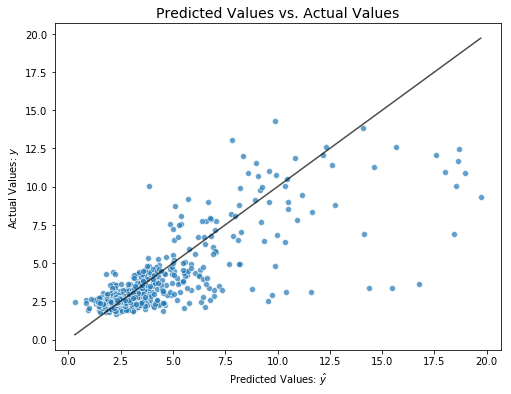

In [106]:
# 1st plot - y_true vs. y_pred
max_d = max(max(y_preds), max(y_test)) 
min_d = min(min(y_preds), min(y_test))

plt.figure(figsize=(8, 6))
plt.xlabel("Predicted Values: $\hat{y}$", fontsize=10)
plt.ylabel("Actual Values: $y$", fontsize=10)
plt.title('Predicted Values vs. Actual Values', fontsize=14)
ax = sns.scatterplot(x=y_test, y=y_preds, alpha=.7)
ax.plot((min_d, max_d),(min_d, max_d), c='black', alpha=.7);

If the points all fell on a diagonal line, then we would have a perfect fit. However, the predictions of this model tend to cluster towards lower values. As the actual values get higher, the predictions become very spread-out. This means that the model's predictions for lower values are relative accurate; but for higher values, the predictions are way-off. In addition, the model tends to over-predict the target.!

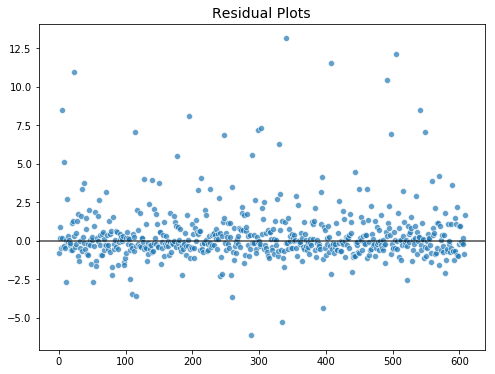

In [107]:
# 2nd plot: residual plot
resids = y_test - y_preds
plt.figure(figsize=(8, 6))
plt.title('Residual Plots', fontsize=14)
ax = sns.scatterplot(x=range(len(resids)), y=resids, alpha=.7)
ax.axhline(0, c='black', alpha =.7);

Check **Independence of Errors** and **Equality of Variance**: the points on this plot shouldn't follow any patterns. However, as we can see, the errors tend to concentrate around the mean, and the points above the zero line are more spread-out. This means that the Independence of Errors and the Equality of Variance assumptions are violated. In addition, it confirms the finding from the previous plot, i.e. the model tends to over-predict the target. 

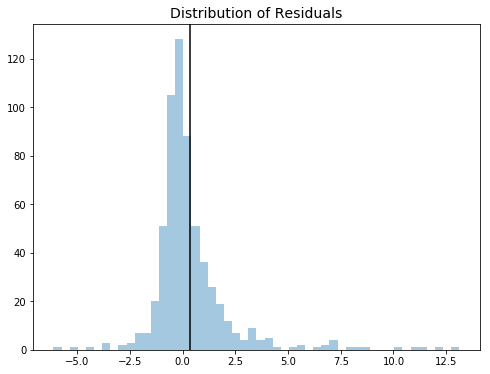

In [108]:
# 3rd plot: distribution of residuals
plt.figure(figsize=(8, 6))
plt.title('Distribution of Residuals', fontsize=14)
sns.distplot(resids, kde=False)
plt.axvline(x=resids.mean(), color='black');

Check **Normality**: The residuals roughly follow a normal distribution with mean 0, albeit some right-skewness.

### Visualize feature importance

In Sklearn, the importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance [(Reference)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

In [109]:
def plot_feature_importance(model, estimator_name, X=None):
    # Iterate through the trees and get the average feature importance 
    # Reference: https://gist.github.com/rtjeannier/69b702f6560b5cc1c0d084a26908d199
    avg_feature_importance = np.mean([
        tree.feature_importances_ for tree in model.best_estimator_[estimator_name]], axis=0)
    
    # Create a pd dataframe
    feature_importance = pd.DataFrame(dict(zip(X.columns, avg_feature_importance)).items(), 
                                      columns=['features', 'importance'])
    
    # Sorted by feature importance
    feature_importance = feature_importance.sort_values(by=['importance'])
    
    # Create plot
    plt.figure(figsize=(10, 15))
    ax = plt.barh(y = feature_importance['features'], width=feature_importance['importance'])
    plt.title('Feature Importance', fontsize=14)
    return feature_importance, ax

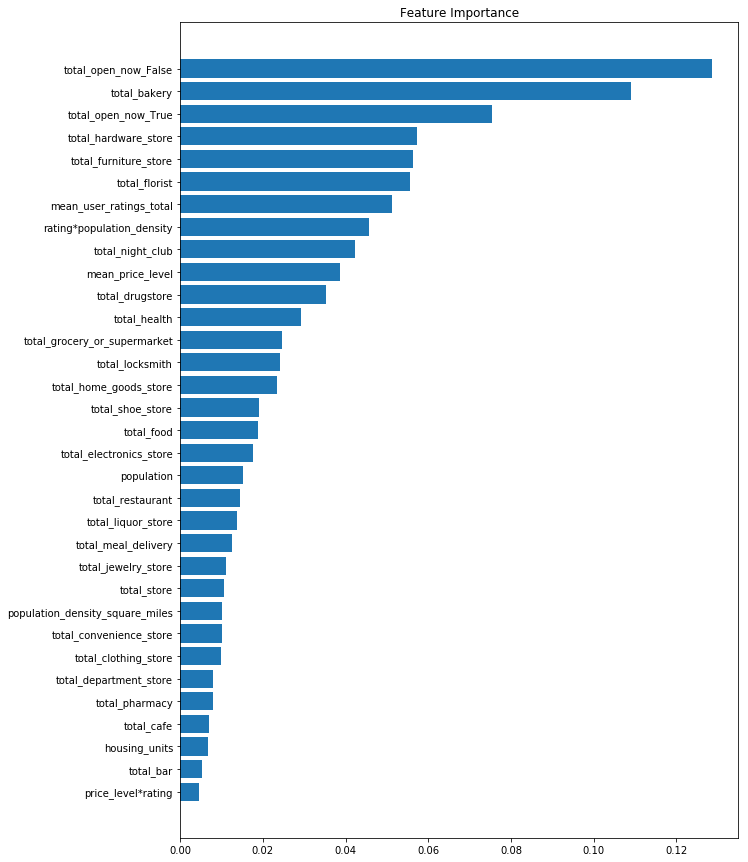

In [70]:
df, ax = plot_feature_importance(modeler_0.get_model('gs_bag'), 'bag',  X=modeler_0.X)

- For a bagged tree model of regression, the feature importance is the error function drops for a variable at each split point, i.e. MSE. 
- These drops in error can be averaged across all decision trees and output to provide an estimate of the importance of each input variable. The greater the drop when the variable was chosen, the greater the importance. [(Reference)](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)
- The feature importance plot is generated based on the `BaggingRegressor` trained on the Pattern_0 dataset. As we can see, the feature 'total_open_now_False' and 'total_open_now_True' are among the most important features. This confirmed our stipulation during the EDA process. 
- Certain business types are among the most important features, such as the total_bakery, total_hardware store etc.
- Many features from the census data (Income dataset) are among the most important features. This is bad news, since my goal is to move towards the next phase, i.e. a generalization of the models which will not reply on any census data.

### Visualize decision tree

Thanks to [Mahdi Shadkam-Farrokhi](https://github.com/Shaddyjr) for sharing the code and reference for plotting the decision tree plot!
[Reference](https://graphviz.readthedocs.io/en/stable/)

In [71]:
cols = modeler_0.X.columns

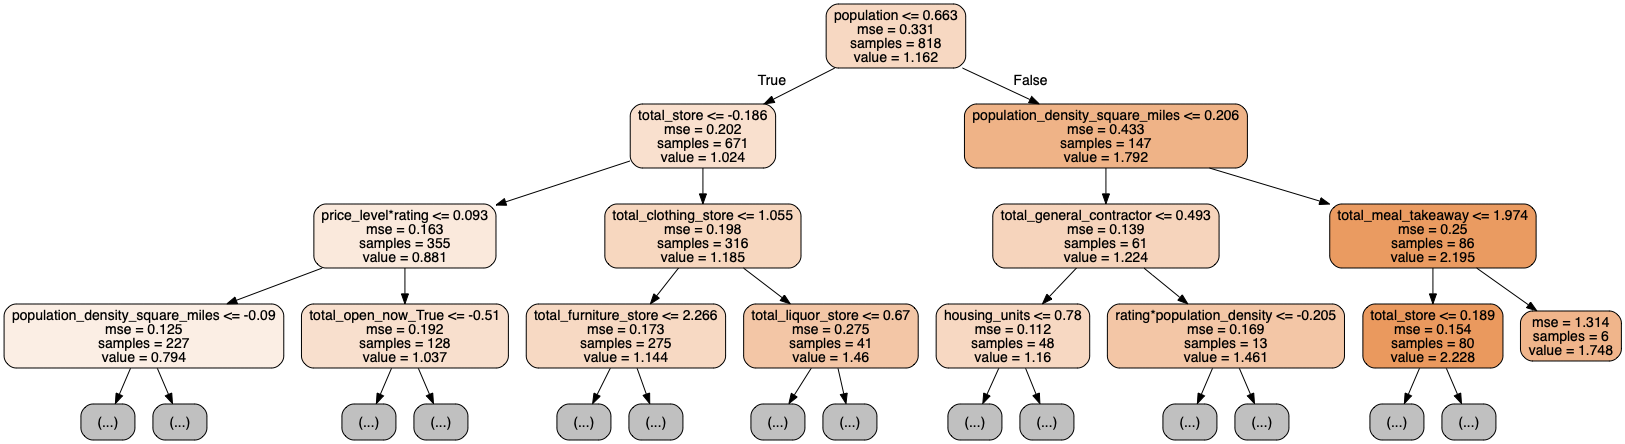

In [110]:
dot_data = StringIO()
export_graphviz(modeler_0.get_model('gs_tree').best_estimator_.steps[1][1], 
                out_file=dot_data, 
                feature_names=cols, 
                filled=True, 
                rounded=True,
                max_depth=3
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

- The above graph demonstrates how the `BaggingRegressor` branches off using the loss function MSE. 
- The different shades of color in each node indicate the value of node: the value is the predicted value devided by the total of samples for each node. 
- On the top is the root node. As we can see, 'population' is where the tree starts to split off, and break into two child nodes: 'population_density' and 'total_store. 
- We see that census related features are playing an important in splitting some top level nodes. 

## Conclusion and Transition into Phase 3

- In Phase 2, I used the aggregated observations by zipcode, combined with census data from the Income dataset to train the model.  
- The **pattern sub-model** enabled me to handle missing data without imputation or dropping observations. 
- Among all the regression models, the **BaggingRegressor** yields the best result based on the test R2 score. However, even the best model still shows signs of high variance, and the result is **not optional**. 
- During the model elevation process, we confirmed that the model violates the **Equality of Variance** and **Independence of Errors** assumptions. 
- **Features from census data** play an importance role in the model's performance. This finding might pose challenges to my goal of developing a generalization of the model: i.e. using the model to predict home affordability ratio in other U.S. regions without retraining the model. 
- In Phase 3, I will exclude all census features and test this assumption. 
